# Chapter 03. 회귀 알고리즘과 모델 규제
# Ch03-1. k-최근접 이웃 회귀
## k-최근접 이웃 회귀

**회귀(Regression)** : 임의의 어떤 숫자를 예측하는 문제

- k-최근접 이웃 회귀
    - 예측하려는 샘플에 가장 가까운 샘플 k개를 선택
    - 이웃한 샘플의 타깃값의 평균을 예측 타깃값으로 봄

## 데이터 준비

In [4]:
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

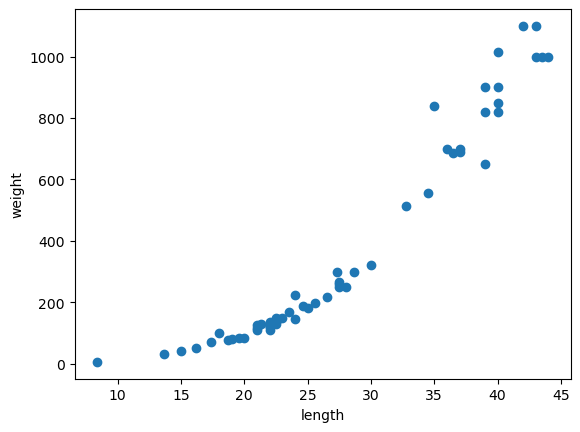

In [6]:
# 이 데이터가 어떤 형태를 띠고 있는지 산점도를 그려봄.
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

농어의 길이가 커질수록 무게가 늘어남.

In [7]:
# 농어 데이터를 머신러닝 모델에 사용하기 위해 훈련 세트와 테스트 세트로 나눔.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42
)

In [11]:
# 사이킷런이 2차원 배열을 input으로 받기 때문에 변환이 필욯마.
# 1차원 배열을 2차원 배열로 변경하는 연습

test_array = np.array([1,2,3,4])
print(test_array.shape)

test_array = test_array.reshape(2,2)
print(test_array.shape)

(4,)
(2, 2)


In [12]:
# reshape() 메서드로 train_input, test_input 배열의 크기 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정계수(R^2)

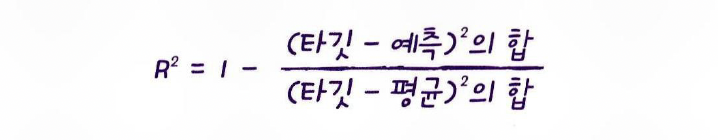

In [13]:
# 회귀 모델 훈련
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
# 모델 평가
knr.score(test_input, test_target)

0.992809406101064

In [ ]:
# 타깃과 예측 값 사이의 차이 구하기
# MAE(Mean Absolute Error) : 타깃과 예측의 절댓값 오차의 평균
from sklearn.metrics import mean_absolute_error

test_prediction = knr.predict(test_input)
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


## 과대적합 vs 과소적합

In [16]:
knr.score(train_input, train_target)

0.9698823289099254

훈련 세트보다 테스트 세트를 사용한 점수가 더 높음. → **과소적합**

- 해결법
    - 모델을 복잡하게 만들기
    - 이웃의 개수 k를 줄이기

In [17]:
# 이웃의 개수 줄이기 5 → 3
knr.n_neighbors = 3

knr.fit(train_input, train_target)
knr.score(train_input, train_target)

0.9804899950518966